In [163]:
# Import statments and plot figures inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [135]:
# Read in the produce dataset
organic = pd.read_csv('produce_dataset.csv')

In [136]:
# Drop the column of index from the previous table (no longer valid indices)
organic.drop('Unnamed: 0', axis =1, inplace=True)

In [137]:
# Dataset is ordered by user_id
organic.head(30)

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits
5,2,1,2168274,2,11,NaN,47766,Organic Avocado,2,0,24,fresh fruits
6,2,1,2168274,2,11,NaN,27966,Organic Raspberries,11,0,123,packaged vegetables fruits
7,2,1,2168274,2,11,NaN,13176,Bag of Organic Bananas,12,0,24,fresh fruits
8,2,1,2168274,2,11,NaN,45066,Honeycrisp Apple,13,0,24,fresh fruits
9,2,2,1501582,5,10,10.0,16797,Strawberries,1,0,24,fresh fruits


In [143]:
# Initialize a total_produce_purchased column with all 1's 
organic['total_produce_purchased'] = 1
organic

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased,organic?
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1,1
9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1,0
9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1,0
9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1,0


In [144]:
# Group the rows by user_id and add the previously initialized total_produce_purchased column (each row is 1)
# This returns a series with user_id, total_produce_purchased
user_total = organic.groupby('user_id')['total_produce_purchased'].sum()
user_total

user_id
1           5
2          43
3          38
4           2
5          23
         ... 
206205     14
206206     34
206207     50
206208    197
206209     20
Name: total_produce_purchased, Length: 194331, dtype: int64

In [145]:
# Create a organic? column containing 1 for an organic produce, 0 for a non-organic produce
organic['organic?'] = organic['product_name'].str.contains('Organic').astype(int)
organic

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased,organic?
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1,1
9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1,0
9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1,0
9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1,0


In [146]:
# Group the rows by user_id and add the previously initialized organic? column (1 for organic, 0 for non-organic)
# This returns a series with user_id, organic?

user_organic = organic.groupby('user_id')['organic?'].sum()
user_organic

user_id
1           3
2          21
3          23
4           2
5          15
         ... 
206205      7
206206     27
206207     47
206208    154
206209      9
Name: organic?, Length: 194331, dtype: int64

In [149]:
# Combine the total and organic series into one dataframe (user_id, total_orders, organic?)
user_df = pd.concat([user_total, user_organic], axis=1).reset_index()
user_df

,user_id,total_produce_purchased,organic?
0,1,5,3
1,2,43,21
2,3,38,23
3,4,2,2
4,5,23,15
...,...,...,...
194326,206205,14,7
194327,206206,34,27
194328,206207,50,47
194329,206208,197,154


In [150]:
# Rename the organic? column to 'organic_produce_purchased'
user_df.rename(columns = {'organic?':'organic_produce_purchased'}, inplace = True) 
user_df

,user_id,total_produce_purchased,organic_produce_purchased
0,1,5,3
1,2,43,21
2,3,38,23
3,4,2,2
4,5,23,15
...,...,...,...
194326,206205,14,7
194327,206206,34,27
194328,206207,50,47
194329,206208,197,154


In [152]:
# Create a new 'organic_%' column that is the percentage of organic produce purchased over total produce purchased
user_df['organic_%'] = user_df['organic_produce_purchased']/user_df['total_produce_purchased']

In [153]:
user_df

,user_id,total_produce_purchased,organic_produce_purchased,organic_%
0,1,5,3,0.600000
1,2,43,21,0.488372
2,3,38,23,0.605263
3,4,2,2,1.000000
4,5,23,15,0.652174
...,...,...,...,...
194326,206205,14,7,0.500000
194327,206206,34,27,0.794118
194328,206207,50,47,0.940000
194329,206208,197,154,0.781726


In [154]:
# Create a new 'segment' column and initialize it with None
user_df['segment'] = None

# Set up the customer segments per the percentage ranges below and assign the values to the 'segment' column
user_df.loc[user_df['organic_%'] < 0.01, 'segment'] = 'Never Organic'
user_df.loc[(user_df['organic_%'] >= 0.01) & (user_df['organic_%'] < 0.25), 'segment'] = 'Organic Taster'
user_df.loc[(user_df['organic_%'] >= 0.25) & (user_df['organic_%'] < 0.50), 'segment'] = 'Light Organic'
user_df.loc[user_df['organic_%'] >= 0.50, 'segment'] = 'Super Organic'

In [155]:
user_df

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment
0,1,5,3,0.600000,Super Organic
1,2,43,21,0.488372,Light Organic
2,3,38,23,0.605263,Super Organic
3,4,2,2,1.000000,Super Organic
4,5,23,15,0.652174,Super Organic
...,...,...,...,...,...
194326,206205,14,7,0.500000,Super Organic
194327,206206,34,27,0.794118,Super Organic
194328,206207,50,47,0.940000,Super Organic
194329,206208,197,154,0.781726,Super Organic


In [157]:
# Filter the user dataframe by removing all users with total produce purchased <10
df_filtered = user_df[user_df['total_produce_purchased'] > 9] 
df_filtered

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment
1,2,43,21,0.488372,Light Organic
2,3,38,23,0.605263,Super Organic
4,5,23,15,0.652174,Super Organic
6,7,58,35,0.603448,Super Organic
7,8,40,20,0.500000,Super Organic
...,...,...,...,...,...
194326,206205,14,7,0.500000,Super Organic
194327,206206,34,27,0.794118,Super Organic
194328,206207,50,47,0.940000,Super Organic
194329,206208,197,154,0.781726,Super Organic


In [158]:
# Check the segments
df_filtered['segment'].unique()

array(['Light Organic', 'Super Organic', 'Organic Taster',
       'Never Organic'], dtype=object)

Text(0, 0.5, 'Count')

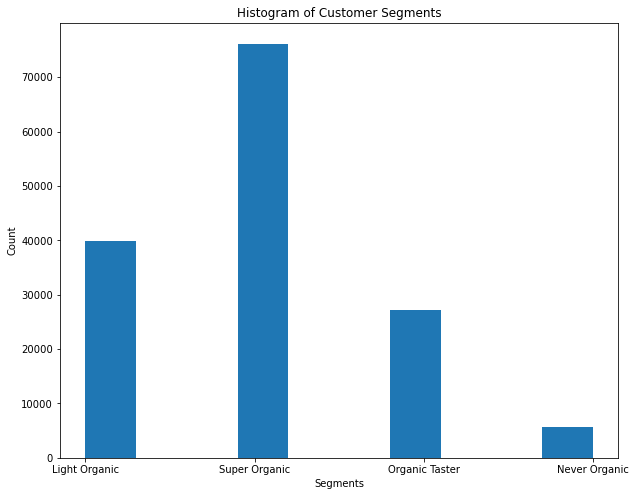

In [162]:
# Plot the count of each segment

plt.figure(figsize=(10,8))

plt.hist(df_filtered['segment'])

plt.title('Histogram of Customer Segments')
plt.xlabel('Segments')
plt.ylabel('Count')

pass

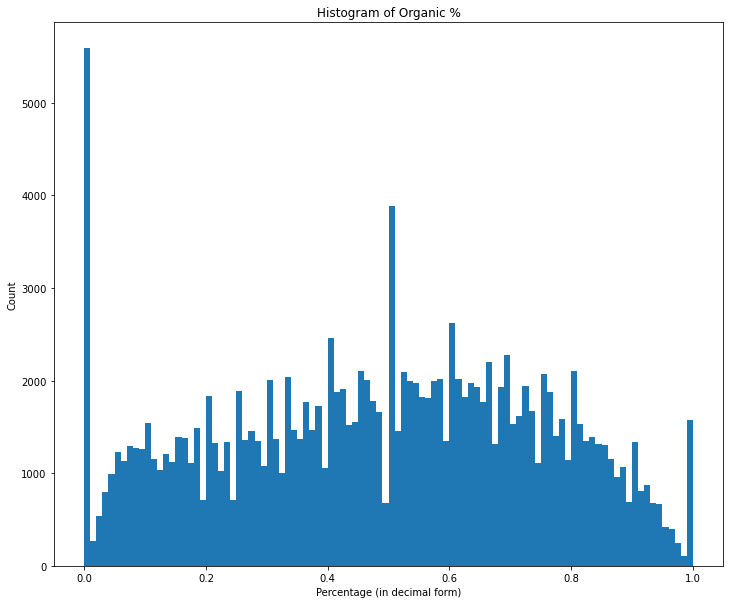

In [167]:
# Plot the histogram of percentage organic from 0-1
plt.figure(figsize=(12,10))

plt.hist(df_filtered['organic_%'], bins = 100)

plt.title('Histogram of Organic %')
plt.xlabel('Percentage (in decimal form)')
plt.ylabel('Count')

pass

### NEEDS FIXIN!


/Users/samuelguytemlock/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


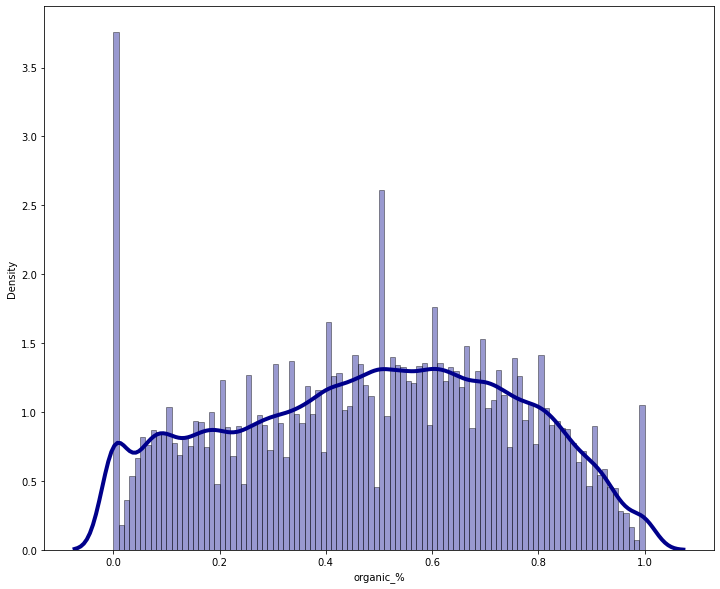

In [173]:
# Plot the density of percentage organic distribution from 0-1

plt.figure(figsize=(12,10))

sns.distplot(df_filtered['organic_%'], hist=True, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
pass